# Semantic search
Looks for the most similar word range from a base text to a given expression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
# NLP
import spacy

/home/targa/miniconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-12 21:39:57.015874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 21:39:58.358706: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-12 21:39:58.358838: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-12 21:39

In [2]:
# es_core_news_lg 500000 keys, 500000 unique vectors (300 dimensions)
nlp = spacy.load("es_core_news_lg")

## Text and search expression

In [3]:
text = """
Johann Sebastian Bach... fue un compositor, músico, director de orquesta, maestro de capilla, cantor y profesor alemán del período barroco.
Fue el miembro más importante de una de las familias de músicos más destacadas de la historia, con más de 35 compositores famosos: la familia Bach. Tuvo una gran fama como organista y clavecinista en toda Europa por su gran técnica y capacidad de improvisar música al teclado. Además del órgano y del clavecín, tocaba el violín y la viola da gamba.
Su fecunda obra es considerada la cima de la música barroca; destaca en ella su profundidad intelectual, su perfección técnica y su belleza artística, además de la síntesis de los diversos estilos nacionales de su época y del pasado. Bach es considerado el último gran maestro del arte del contrapunto1 y fuente de inspiración e influencia para posteriores compositores y músicos, tales como Joseph Haydn, Wolfgang Amadeus Mozart, Ludwig van Beethoven, Felix Mendelssohn, Robert Schumann y Frédéric Chopin, entre muchos otros. 
La obra de Bach se puede dividir en tres grandes períodos bien diferenciados, marcados por las influencias y la asimilación de los estilos de su época, el desarrollo, búsqueda y evolución de su estilo personal, y los puestos profesionales que desempeñó
El primer período, el de aprendizaje y estudio, va desde 1700 hasta 1713, estando ya en Weimar; en él escribió música para teclado y cantatas sacras, y formó su estilo, que sintetizó toda la tradición de la música clásica europea precedente: la polifonía clásica fijada en tiempos de Giovanni Pierluigi da Palestrina; el primer Barroco de Girolamo Frescobaldi; la música francesa del siglo XVII; y la de autores alemanes e italianos de su época como Dietrich Buxtehude, Johann Pachelbel y Antonio Vivaldi. De este último copió y adaptó obras desde su juventud: así lo hizo en Weimar, cuando, gracias al duque, pudo versionar algunas de sus obras en sus Conciertos BWV 592-597 y BWV 972-987. Bach también se interesaba en compositores contemporáneos, a quienes estudiaba y con muchos de los cuales mantuvo una relación personal directa. Entre ellos se encontraban Jan Dismas Zelenka, Johann Mattheson, Georg Philipp Telemann, Reinhard Keiser y Georg Friedrich Händel
"""
search_for = "Bach es uno de los compositores más importantes de la historia"

Colaboradores de Wikipedia. Johann Sebastian Bach [en línea]. Wikipedia, La enciclopedia libre, 2023 [fecha de consulta: 12 de marzo del 2023]. Disponible en <https://es.wikipedia.org/w/index.php?title=Johann_Sebastian_Bach&oldid=149687973>. 

## Spacy parsing

In [4]:
base_doc = nlp(text)
base_doc


Johann Sebastian Bach... fue un compositor, músico, director de orquesta, maestro de capilla, cantor y profesor alemán del período barroco.
Fue el miembro más importante de una de las familias de músicos más destacadas de la historia, con más de 35 compositores famosos: la familia Bach. Tuvo una gran fama como organista y clavecinista en toda Europa por su gran técnica y capacidad de improvisar música al teclado. Además del órgano y del clavecín, tocaba el violín y la viola da gamba.
Su fecunda obra es considerada la cima de la música barroca; destaca en ella su profundidad intelectual, su perfección técnica y su belleza artística, además de la síntesis de los diversos estilos nacionales de su época y del pasado. Bach es considerado el último gran maestro del arte del contrapunto1 y fuente de inspiración e influencia para posteriores compositores y músicos, tales como Joseph Haydn, Wolfgang Amadeus Mozart, Ludwig van Beethoven, Felix Mendelssohn, Robert Schumann y Frédéric Chopin, ent

In [5]:
[(token.pos_, token.lemma_) for token in base_doc]

[('SPACE', '\n'),
 ('PROPN', 'Johann'),
 ('PROPN', 'Sebastian'),
 ('PROPN', 'Bach'),
 ('PUNCT', '...'),
 ('AUX', 'ser'),
 ('DET', 'uno'),
 ('NOUN', 'compositor'),
 ('PUNCT', ','),
 ('NOUN', 'músico'),
 ('PUNCT', ','),
 ('NOUN', 'director'),
 ('ADP', 'de'),
 ('NOUN', 'orquesta'),
 ('PUNCT', ','),
 ('NOUN', 'maestro'),
 ('ADP', 'de'),
 ('NOUN', 'capilla'),
 ('PUNCT', ','),
 ('NOUN', 'cantor'),
 ('CCONJ', 'y'),
 ('NOUN', 'profesor'),
 ('ADJ', 'alemán'),
 ('ADP', 'del'),
 ('NOUN', 'período'),
 ('ADJ', 'barroco'),
 ('PUNCT', '.'),
 ('SPACE', '\n'),
 ('AUX', 'ser'),
 ('DET', 'el'),
 ('NOUN', 'miembro'),
 ('ADV', 'más'),
 ('ADJ', 'importante'),
 ('ADP', 'de'),
 ('PRON', 'uno'),
 ('ADP', 'de'),
 ('DET', 'el'),
 ('NOUN', 'familia'),
 ('ADP', 'de'),
 ('NOUN', 'músico'),
 ('ADV', 'más'),
 ('ADJ', 'destacado'),
 ('ADP', 'de'),
 ('DET', 'el'),
 ('NOUN', 'historia'),
 ('PUNCT', ','),
 ('ADP', 'con'),
 ('ADV', 'más'),
 ('ADP', 'de'),
 ('NUM', '35'),
 ('NOUN', 'compositor'),
 ('ADJ', 'famoso'),
 ('PUN

In [6]:
# all parts of speech found (POS)
set([token.pos_ for token in base_doc])

{'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'SPACE',
 'VERB'}

# Extracting lexical features

In [7]:
# lexical features POS
lexical_pos = ['VERB', 'ADJ', 'ADV', 'NOUN', 'PRON', 'PROPN']

In [8]:
base_lexical_features = [(index, token) for index, token in enumerate(base_doc) 
                       if token.pos_ in lexical_pos]
base_lexical_features

[(1, Johann),
 (2, Sebastian),
 (3, Bach),
 (7, compositor),
 (9, músico),
 (11, director),
 (13, orquesta),
 (15, maestro),
 (17, capilla),
 (19, cantor),
 (21, profesor),
 (22, alemán),
 (24, período),
 (25, barroco),
 (30, miembro),
 (31, más),
 (32, importante),
 (34, una),
 (37, familias),
 (39, músicos),
 (40, más),
 (41, destacadas),
 (44, historia),
 (47, más),
 (50, compositores),
 (51, famosos),
 (54, familia),
 (55, Bach),
 (57, Tuvo),
 (59, gran),
 (60, fama),
 (62, organista),
 (64, clavecinista),
 (67, Europa),
 (70, gran),
 (71, técnica),
 (73, capacidad),
 (75, improvisar),
 (76, música),
 (78, teclado),
 (80, Además),
 (82, órgano),
 (85, clavecín),
 (87, tocaba),
 (89, violín),
 (92, viola),
 (93, da),
 (94, gamba),
 (98, fecunda),
 (99, obra),
 (101, considerada),
 (103, cima),
 (106, música),
 (107, barroca),
 (109, destaca),
 (111, ella),
 (113, profundidad),
 (114, intelectual),
 (117, perfección),
 (118, técnica),
 (121, belleza),
 (122, artística),
 (124, además

In [9]:
search_doc = nlp(search_for)
search_lexical_features = [(index, token) for index, token in enumerate(search_doc) 
                         if token.pos_ in lexical_pos]
search_lexical_features

[(0, Bach),
 (2, uno),
 (5, compositores),
 (6, más),
 (7, importantes),
 (10, historia)]

## Comparison


In [10]:
### Similarity between the two lists AxB

In [11]:
shape = len(base_lexical_features), len(search_lexical_features)
similarity_cartesian_product = np.zeros(shape)
similarity_cartesian_product.shape

(215, 6)

In [12]:
# cartesian product: token x token similarity, but aggregate on base 
for index1, (_, base_token) in enumerate(base_lexical_features):
    for index2, (_, search_token) in enumerate(search_lexical_features):
        if base_token.text == search_token.text:
            similarity_cartesian_product[index1, index2] += 1
        else:
            try:
                sim = base_token.similarity(search_token)
                similarity_cartesian_product[index1, index2] += sim
            except AttributeError:
                print('method not found on', base_token, search_token)
                # propn tienen vectores


/tmp/ipykernel_137979/3078917170.py:8: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  sim = base_token.similarity(search_token)


In [13]:
# collapse columns using sum
similarity_sums = similarity_cartesian_product.sum(axis=1)
# normalize using column count
similarity_sums /= similarity_cartesian_product.shape[1]
similarity_sums.max(), similarity_sums.shape

(0.48343128710985184, (215,))

### Simple threshold
+ cons: discontinuity

In [14]:
quantile = 0.9
threshold = np.quantile(similarity_sums, quantile)
threshold, max(similarity_sums)

(0.3365259287257989, 0.48343128710985184)

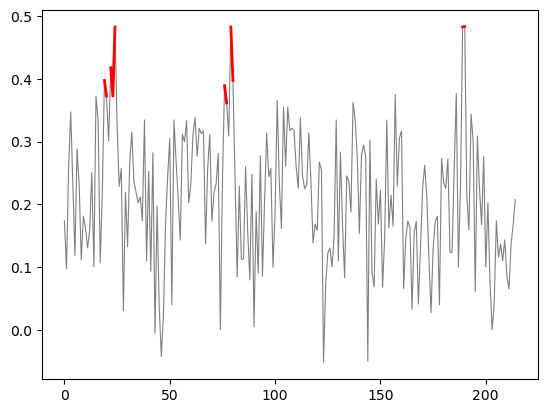

'Johann Sebastian Bach COMPOSITOR músico director orquesta maestro capilla cantor profesor alemán período barroco miembro MÁS importante una familias MÚSICOS MÁS destacadas HISTORIA MÁS COMPOSITORES famosos familia Bach Tuvo gran fama organista clavecinista Europa gran técnica capacidad improvisar música teclado Además órgano clavecín tocaba violín viola da gamba fecunda obra considerada cima música barroca destaca ella profundidad intelectual perfección técnica belleza artística ADEMÁS síntesis estilos nacionales época pasado Bach considerado último gran maestro arte contrapunto1 fuente INSPIRACIÓN INFLUENCIA posteriores COMPOSITORES MÚSICOS tales Joseph Haydn Wolfgang Amadeus Mozart Ludwig van Beethoven Felix Mendelssohn Robert Schumann Frédéric Chopin otros obra Bach se dividir GRANDES períodos bien DIFERENCIADOS marcados INFLUENCIAS asimilación estilos época desarrollo búsqueda EVOLUCIÓN estilo personal puestos profesionales que desempeñó primer período aprendizaje estudio va 1713 

In [15]:
plt.plot(similarity_sums, c='gray', linewidth=0.8)
# max similarity
filtered = similarity_sums.copy()
filtered[similarity_sums < threshold] = np.nan
plt.plot(filtered, c='red', linewidth=2)
plt.show()

' '.join([token.text.upper() if similarity_sums[index] > threshold else token.text
          for index, (_, token) in enumerate(base_lexical_features)])

### Smooth and range around max value

In [16]:
def smooth_and_range(values, 
                     quantile):
    window_length = max(4, len(values) // 3)
    if window_length % 2 == 0:  # even
        window_length += 1  # window_length must be odd.
    # Polyorder must be less than window_length.
    polyorder = 3
    """ Apply a Savitzky-Golay filter to an array.

    This is a 1-D filter. If `x`  has dimension greater than 1, `axis`
    determines the axis along which the filter is applied.

    Parameters
    ----------
    x : array_like
        The data to be filtered. If `x` is not a single or double precision
        floating point array, it will be converted to type ``numpy.float64``
        before filtering.
    window_length : int
        The length of the filter window (i.e., the number of coefficients).
        If `mode` is 'interp', `window_length` must be less than or equal
        to the size of `x`.
    polyorder : int
        The order of the polynomial used to fit the samples.
        `polyorder` must be less than `window_length`.
    """    
    filtered_values = savgol_filter(values, window_length=window_length, polyorder=polyorder)
    
    # define range around max point
    # filtered_values.argmax(), filtered_values.max()
    range_start = 0
    range_end = 0
    range_max = filtered_values.argmax()
    min_q = np.quantile(filtered_values, quantile)
    
    indices = np.arange(values.shape[0])
    xy = list(zip(indices, filtered_values))

    # argmax leftwards (reversion)
    for index, value in reversed(xy[:range_max]):
        if value < min_q:
            range_start = index
            break
    # argmax rightwards
    for index, value in xy[range_max:]:
        if value < min_q:
            range_end = index
            break
    return range_start, range_max, range_end, filtered_values

In [17]:
quantile = 0.9
range_start, range_max, range_end, filtered_values = smooth_and_range(similarity_sums,
                                                               quantile=quantile)
nrange = np.arange(range_start, range_end + 1)
range_max, nrange

(18,
 array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
        26, 27, 28]))

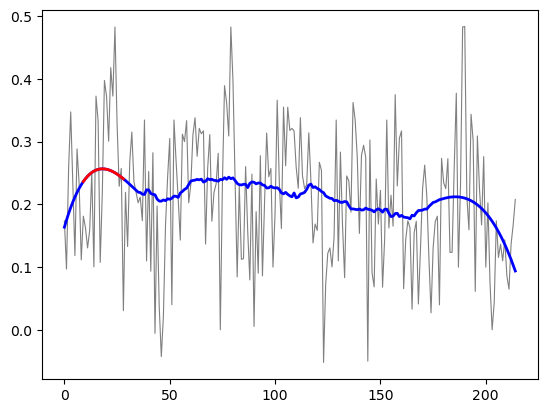

'cantor profesor alemán período barroco miembro más importante una familias músicos más destacadas historia más compositores famosos familia Bach Tuvo'

In [18]:
plt.plot(similarity_sums, c='gray', linewidth=0.8)
plt.plot(filtered_values, c='blue', linewidth=2)

filtered = filtered_values.copy()
mask = np.ones(filtered.shape, dtype=bool)
mask[np.arange(range_start, range_end + 1)] = 0
filtered[mask] = np.nan

plt.plot(filtered, c='red', linewidth=2)
plt.show()

' '.join([base_lexical_features[index][1].text for index in list(nrange)])

In [19]:
word_start, _ = base_lexical_features[range_start]
word_end, _ = base_lexical_features[range_end]
word_start, word_end

(19, 57)

In [20]:
# show whole sentences
# base_doc[word_start].__dir__()
base_doc[word_start].sent, base_doc[word_end].sent

(Johann Sebastian Bach... fue un compositor, músico, director de orquesta, maestro de capilla, cantor y profesor alemán del período barroco.,
 Tuvo una gran fama como organista y clavecinista en toda Europa por su gran técnica y capacidad de improvisar música al teclado.)